# 4.10 Coding Etiquette and Excell Reporting

1-Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

2-The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. 

3-The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

4-The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

5-Create an appropriate visualization to show the distribution of profiles.

6-Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

7-Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

8-Produce suitable charts to illustrate your results and export them in your project folder.

#Import Libraries and Dataframes

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Dataframes
path = r'C:\Users\kenwh'

In [3]:
df = pd.read_pickle(os.path.join(path, 'Instacart Basket Anaylsis', '02 Data','Prepared Data', 'orders_products_combined.pkl'))

#Part 2- Identify any PII/security implications

The dataset includes personally identifiable information (PII) such as user_id, gender, age, number of dependents, family status, and income. This data has been artificially generated for training purposes, and therefore the information does not represent real individuals 
If using actual customer data, then it would need to be appropriately redacted from the dataset to ensure privacy and compliance with data protection regulations.

# Part 3 - Create a regional segmentation of the data

In [4]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge_sample', 'price_range_loc',
       'busiest_day', 'busiest_days', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'First Name', 'Last_Name', 'Gender', 'State', 'Age',
       'date_joined', 'dependants', 'family_status', 'income', '_merge'],
      dtype='object')

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last_Name,Gender,State,Age,date_joined,dependants,family_status,income,_merge
0,1622621,153719,20,6,Average orders,13.0,27737,28,0,Brown Rice Black-Eyed Peas and Veggies Bowl,...,Doris,Richmond,Female,California,41,2020-01-31,2,married,85350,both
1,2657362,153719,57,0,Average orders,3.0,28123,20,1,Organic Cut Green Beans,...,Doris,Richmond,Female,California,41,2020-01-31,2,married,85350,both
2,1325818,153719,68,1,Most orders,2.0,32043,15,0,Organic Low Fat Vanila Milk,...,Doris,Richmond,Female,California,41,2020-01-31,2,married,85350,both
3,1776771,153719,10,6,Most orders,20.0,28934,19,1,Frozen Broccoli Florets,...,Doris,Richmond,Female,California,41,2020-01-31,2,married,85350,both
4,2657362,153719,57,0,Average orders,3.0,19173,8,1,Orange Calcium & Vitamin D Pulp Free,...,Doris,Richmond,Female,California,41,2020-01-31,2,married,85350,both


First step- Define Regions

In [6]:
# Define Northeast states
northeast_states = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [7]:
df.loc[df['State'].isin(northeast_states), 'region'] = 'Northeast'

In [8]:
# Define Midwest states
mid_west_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [9]:
df.loc[df['State'].isin(mid_west_states), 'region'] = 'Midwest'

In [10]:
# Define South states
south_states = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [11]:
df.loc[df['State'].isin(south_states), 'region'] = 'South'

In [12]:
# Define West states
west_states = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [13]:
df.loc[df['State'].isin(west_states), 'region'] = 'West'

#second-step- Explore spending habits between regions

In [14]:
# Pivot spending_flag base on region
spend_by_region = pd.crosstab(df['region'], df['spending_flag'], dropna = False).sort_values(by = 'High spender', ascending = False)

In [15]:
spend_by_region

spending_flag,High spender,Low spender
region,,
South,6412,326125
West,4845,251186
Midwest,4797,229905
Northeast,3338,173392


In [16]:
spend_by_region.index = spend_by_region.index.where(spend_by_region.index != 'nan', 'South')

In [17]:
spend_by_region

spending_flag,High spender,Low spender
region,,
South,6412,326125
West,4845,251186
Midwest,4797,229905
Northeast,3338,173392


In [18]:
spend_by_region['High_to_Low_Ratio'] = spend_by_region['High spender'] / spend_by_region['Low spender']

In [19]:
spend_by_region['Total_Spenders'] = spend_by_region['High spender'] + spend_by_region['Low spender']

In [20]:
spend_by_region['High_to_Low_Ratio_%'] = spend_by_region['High_to_Low_Ratio'] * 100

In [21]:
spend_by_region

spending_flag,High spender,Low spender,High_to_Low_Ratio,Total_Spenders,High_to_Low_Ratio_%
region,,,,,
South,6412,326125,0.019661,332537,1.966117
West,4845,251186,0.019288,256031,1.928850
Midwest,4797,229905,0.020865,234702,2.086514
Northeast,3338,173392,0.019251,176730,1.925118


We can see from the above chart that spending habits are pretty similar for each region. every region has approximetly 2% of their spenders as high spenders. In addition, we can see that there are the most total spenders in the West Region, and the fewest in the Northeast.

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

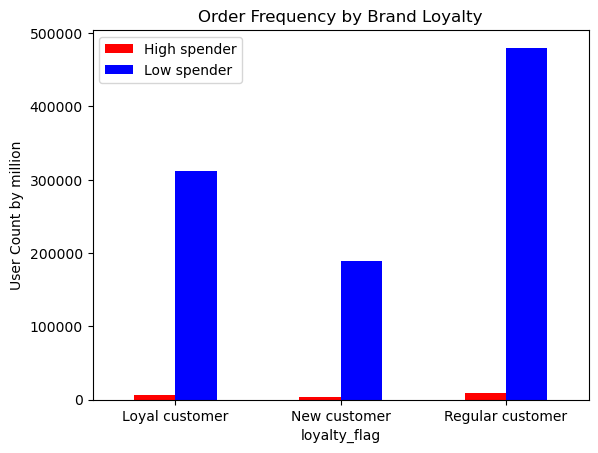

In [22]:
# Group frequency flag by loyalty flag
grouped_counts = df.groupby(['loyalty_flag', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['red', 'blue'])

# Add labels and title
plt.legend(title=None)
plt.ylabel('User Count by million')
plt.title('Order Frequency by Brand Loyalty')
plt.xticks(rotation=0)



# Create new dataframe exculding low activity customers

In [23]:
# define low activity customers (those that have less then 5 orders)
df.loc[df['order_number'] < 5, 'customer_activity'] = 'low_activity customers'

# Define high_activity customers (those with 5 or more orders
df.loc[df['order_number'] >= 5, 'customer_activity'] = 'high_activity customer'

In [24]:
df['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    753400
low_activity customers    246600
Name: count, dtype: int64

we know this is correct becasue this equals 1,000,0000 total customers, which is the sample size we are using for this exercise

In [25]:
#exclude low activtiy customers
df_high_activity = df[df['customer_activity'] != 'low_activity customers']

In [26]:
df_high_activity.count()

order_id                      753400
user_id                       753400
order_number                  753400
orders_day_of_week            753400
order_hour_of_day             753400
days_since_prior_order        753400
product_id                    753400
add_to_cart_order             753400
reordered                     753400
product_name                  753400
aisle_id                      753400
department_id                 753400
prices                        753400
_merge_sample                 753400
price_range_loc               753400
busiest_day                   753400
busiest_days                  753400
max_order                     753400
loyalty_flag                  753400
mean_product_price            753400
spending_flag                 753400
median_days_between_orders    753400
order_frequency               753400
First Name                    711880
Last_Name                     753400
Gender                        753400
State                         753400
A

In [27]:
#export new dataframe
df_high_activity.to_pickle(os.path.join(path, 'Instacart Basket Anaylsis', '02 Data','Prepared Data', 'high_activity_users.pkl'))

Task 5 -  Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

In [28]:
df_high_activity['income'].describe()

count    753400.000000
mean      99858.966156
std       43310.829925
min       25955.000000
25%       67487.000000
50%       96823.000000
75%      128145.000000
max      593901.000000
Name: income, dtype: float64

In [29]:
df_high_activity['Age'].describe()

count    753400.000000
mean         49.486228
std          18.494250
min          18.000000
25%          33.000000
50%          49.000000
75%          66.000000
max          81.000000
Name: Age, dtype: float64

In [30]:
df_high_activity['dependants'].describe()

count    753400.000000
mean          1.504551
std           1.118924
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: dependants, dtype: float64

Based on the above data, we can create profiles based age and income. We can split them each into three tiers. Tier 1 is the bottome 25%, teir two is from 25-50%, and tier 3 is from 75-100%. Using this will make six total tiers that sort by both age and income

#define differnt age and income groups

In [31]:
# Define low-income young adult group
df_high_activity.loc[(df_high_activity['Age'] >= 18) & (df_high_activity['Age'] <= 33) 
         & (df_high_activity['income'] >= 25955) & (df_high_activity['income'] <= 67487),
         'customer_profile'] = 'low-income young adult'

C:\Users\kenwh\AppData\Local\Temp\ipykernel_31556\171190995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[(df_high_activity['Age'] >= 18) & (df_high_activity['Age'] <= 33)


In [32]:
# Define low-income middle age group
df_high_activity.loc[(df_high_activity['Age'] >33) & (df_high_activity['Age'] < 66) 
         & (df_high_activity['income'] >= 25955) & (df_high_activity['income'] <= 67487),
         'customer_profile'] = 'low-income middle age'

In [33]:
# Define low-income senior group
df_high_activity.loc[(df_high_activity['Age'] >= 66) & (df_high_activity['Age'] <= 81) 
         & (df_high_activity['income'] >= 25955) & (df_high_activity['income'] <= 67487),
         'customer_profile'] = 'low-income senior group'

In [34]:
# Define mid-income young adult group
df_high_activity.loc[(df_high_activity['Age'] >= 18) & (df_high_activity['Age'] <= 33) 
         & (df_high_activity['income'] >67487) & (df_high_activity['income'] < 128145),
         'customer_profile'] = 'mid-income young adult'

In [35]:
# Define high-income young adult group
df_high_activity.loc[(df_high_activity['Age'] >= 18) & (df_high_activity['Age'] <= 33) 
         & (df_high_activity['income'] >= 128145) & (df_high_activity['income'] <= 593901),
         'customer_profile'] = 'high-income young adult'

In [36]:
# Define mid-income middle age group
df_high_activity.loc[(df_high_activity['Age'] >33) & (df_high_activity['Age'] <66) 
         & (df_high_activity['income'] >67487) & (df_high_activity['income'] <= 128145),
         'customer_profile'] = 'mid-income middle age'

In [37]:
# Define mid-income senior group
df_high_activity.loc[(df_high_activity['Age'] >= 66) & (df_high_activity['Age'] <= 81)
         & (df_high_activity['income'] >67487) & (df_high_activity['income'] <= 128145),
         'customer_profile'] = 'mid-income senior group'

In [38]:
# Define high-income middle age group
df_high_activity.loc[(df_high_activity['Age'] >33) & (df_high_activity['Age'] <66) 
         & (df_high_activity['income'] >= 128145) & (df_high_activity['income'] <= 593901),
         'customer_profile'] = 'high-income middle age'

In [39]:
# Define high-income senior age group
df_high_activity.loc[(df_high_activity['Age'] >= 66) & (df_high_activity['Age'] <= 81) 
         & (df_high_activity['income'] >= 128145) & (df_high_activity['income'] <= 593901),
         'customer_profile'] = 'high-income senior group'

#data based on customer profiles

In [40]:
# Number of dependants by customer profile
cust_dependants = pd.crosstab(df_high_activity['customer_profile'], df_high_activity['dependants'], dropna = False)
cust_dependants

dependants,0,1,2,3
customer_profile,,,,
high-income middle age,29327,28404,28169,28500
high-income senior group,17582,17710,18178,18356
high-income young adult,483,517,602,533
low-income middle age,19366,18755,19191,19151
low-income senior group,5573,6332,5967,5855
low-income young adult,22116,21669,22166,22264
mid-income middle age,45870,47118,45382,46985
mid-income senior group,22961,22686,23915,23335
mid-income young adult,24412,24467,24715,24788


In [41]:
#family satus based on customer proflie
cust_dependants = pd.crosstab(df_high_activity['customer_profile'], df_high_activity['family_status'], dropna = False)
cust_dependants

family_status,divorced/widowed,living with parents and siblings,married,single
customer_profile,,,,
high-income middle age,7051,0,85073,22276
high-income senior group,17582,0,54244,0
high-income young adult,0,487,1165,483
low-income middle age,2316,0,57097,17050
low-income senior group,5573,0,18154,0
low-income young adult,0,16277,49822,22116
mid-income middle age,8757,0,139485,37113
mid-income senior group,22961,0,69936,0
mid-income young adult,0,19504,54466,24412


In [42]:
# Distribution of customer profile
df_high_activity['customer_profile'].value_counts()

customer_profile
mid-income middle age       185355
high-income middle age      114400
mid-income young adult       98382
mid-income senior group      92897
low-income young adult       88215
low-income middle age        76463
high-income senior group     71826
low-income senior group      23727
high-income young adult       2135
Name: count, dtype: int64

These charts above break our high frequency instacart customers into 9 subsets. As you can see, the most common subset is middle aged and mid income, while the smallest subset is high income young adult. We can also see from teh first table above that across each subset there is a clsoe to equal distribution in the number of depednets a customer has, with bumbers simmilar across each row.

The family status table shows that young adults are living with parents and or siblings, while middle aged customers are a mixture of divorced/widowed, married and single, and seniors who use instacart are either divorced/widowed or married.

The graphs and charts below will also help to display the data found above

# Task 6- Visualizations related to distributions of profiles

Text(0.5, 1.0, 'Number of Users')

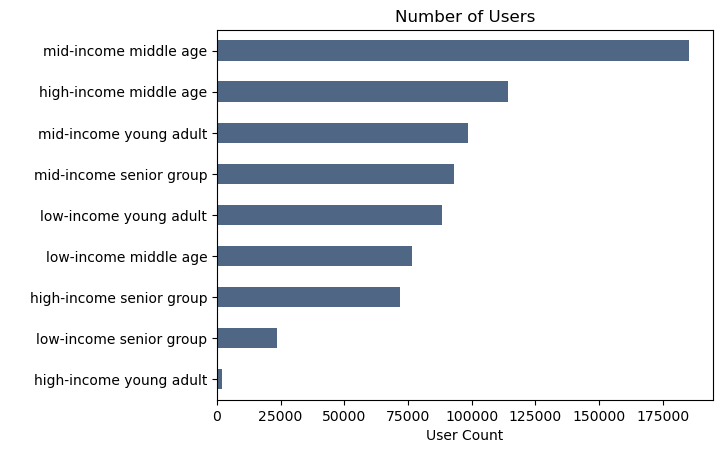

In [43]:
bar=df_high_activity['customer_profile'].value_counts(dropna= False).sort_values(ascending= True).plot.barh(color='#4f6784')
plt.ylabel(' ') # Eliminate y label
plt.xlabel('User Count')
# Add a title
plt.title('Number of Users')

In [44]:
#Save file to acces
bar.figure.savefig(os.path.join(path, 'Instacart Basket Anaylsis', '04 Analysis','Visualizations', 'customer_profile_demographic_frequency_bar.png'))

# Departments

In [45]:

department_dictionary = {
                            1: 'frozen',
                            2: 'other',
                            3: 'bakery',
                            4: 'produce',
                            5: 'alcohol',
                            6: 'international',
                            7: 'beverages',
                            8: 'pets',
                            9: 'dry goods pasta',
                            10: 'bulk',
                            11: 'personal care',
                            12: 'meat seafood',
                            13: 'pantry',
                            14: 'breakfast',
                            15: 'canned goods',
                            16: 'dairy eggs',
                            17: 'household',
                            18: 'babies',
                            19: 'snacks',
                            20: 'deli',
                                                    }

In [46]:

# Add a new column 'department' to existing table
alter_query = "ALTER TABLE df_high_activity ADD COLUMN department VARCHAR(255)"


# Update the 'department' column based on department number
for department_id, department_name in department_dictionary.items():
    update_query = f"UPDATE df_high_activity SET department = '{department_name}' WHERE department_id = {department_id}"
    

In [47]:
df_high_activity.columns



Object `up` not found.


In [48]:
df_high_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,dependants,family_status,income,_merge,region,customer_activity,customer_profile
0,1622621,153719,20,6,Average orders,13.0,27737,28,0,Brown Rice Black-Eyed Peas and Veggies Bowl,...,California,41,2020-01-31,2,married,85350,both,West,high_activity customer,mid-income middle age
1,2657362,153719,57,0,Average orders,3.0,28123,20,1,Organic Cut Green Beans,...,California,41,2020-01-31,2,married,85350,both,West,high_activity customer,mid-income middle age
2,1325818,153719,68,1,Most orders,2.0,32043,15,0,Organic Low Fat Vanila Milk,...,California,41,2020-01-31,2,married,85350,both,West,high_activity customer,mid-income middle age
3,1776771,153719,10,6,Most orders,20.0,28934,19,1,Frozen Broccoli Florets,...,California,41,2020-01-31,2,married,85350,both,West,high_activity customer,mid-income middle age
4,2657362,153719,57,0,Average orders,3.0,19173,8,1,Orange Calcium & Vitamin D Pulp Free,...,California,41,2020-01-31,2,married,85350,both,West,high_activity customer,mid-income middle age


In [49]:
df_high_activity['department_id'].value_counts()

department_id
4     222051
16    127212
19     67446
7      62944
1      50488
13     43092
3      27357
15     24347
20     24274
9      19585
17     16620
14     16354
12     16057
18     10417
11     10097
6       6190
5       3238
8       2168
21      1798
10       867
2        798
Name: count, dtype: int64

In [95]:
# Groupby

df_loyal_dept_group = df_high_activity.groupby(['department_id','loyalty_flag' ]).size().unstack()

In [51]:
df_loyal_dept_group.head(30)

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,17365,4898,28225
2,288,77,433
3,10971,2283,14103
4,90174,18247,113630
5,1086,339,1813
6,2307,552,3331
7,24608,5552,32784
8,718,200,1250
9,6982,1960,10643


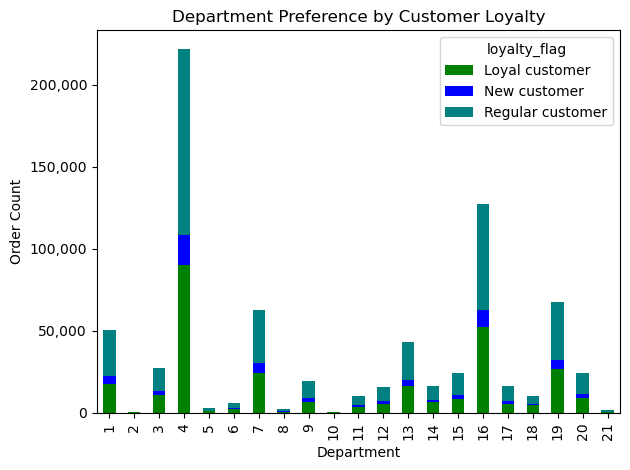

In [96]:



colors = ['green', 'blue', 'teal']
loyal_dept_group_bar = df_loyal_dept_group.plot(kind='bar', stacked=True, color=colors)

plt.title('Department Preference by Customer Loyalty')
plt.xlabel('Department')
plt.ylabel('Order Count')



# Set title and labels
plt.title('Department Preference by Customer Loyalty')
plt.xlabel('Department')
plt.ylabel('Order Count')


# Set y-axis tick format to integer (no scientific notation)
loyal_dept_group_bar.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()



department names by column = { 1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol', 6: 'international', 7: 'beverages', 8: 'pets', 9: 'dry goods pasta', 10: 'bulk', 11: 'personal care', 12: 'meat seafood', 13: 'pantry', 14: 'breakfast', 15: 'canned goods', 16: 'dairy eggs', 17: 'household', 18: 'babies', 19: 'snacks', 20: 'deli', }

From this graph you can clearly see which type of customers order from each department. Cross listing it from teh data dictionary above, it looks like produce, dairy and snacks are the three largest categories of instacarts business, and that the ratios throughout the departments are realitivly the same for the types of customers ordering.

In [53]:
#Save file to acces
loyal_dept_group_bar.figure.savefig(os.path.join(path, 'Instacart Basket Anaylsis', '04 Analysis','Visualizations', 'loyal_dept_group_bar.png'))

#Step 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [54]:
aggregate_customer_profile = df_high_activity.groupby('user_id').agg({
    'Age': ['max', 'mean', 'min'],
    'dependants': ['max', 'mean', 'min']
}).reset_index()

In [55]:
print(aggregate_customer_profile)

       user_id Age           dependants         
               max  mean min        max mean min
0            2  68  68.0  68          3  3.0   3
1            3  33  33.0  33          3  3.0   3
2            7  39  39.0  39          2  2.0   2
3           10  34  34.0  34          2  2.0   2
4           12  46  46.0  46          0  0.0   0
...        ...  ..   ...  ..        ...  ...  ..
122623  206203  81  81.0  81          3  3.0   3
122624  206206  25  25.0  25          2  2.0   2
122625  206207  76  76.0  76          1  1.0   1
122626  206208  64  64.0  64          1  1.0   1
122627  206209  74  74.0  74          3  3.0   3

[122628 rows x 7 columns]


#8 - Compare your customer profiles with regions and departments

In [56]:
df_dept_by_region = df_high_activity.groupby(['department_id', 'region']).size().unstack()

In [57]:
print(df_dept_by_region)

region         Midwest  Northeast  South   West
department_id                                  
1                11867       8753  16927  12941
2                  188        162    264    184
3                 6390       4935   8907   7125
4                52229      38854  74143  56825
5                  770        593   1083    792
6                 1436       1116   2035   1603
7                14623      11630  20773  15918
8                  486        412    685    585
9                 4567       3485   6444   5089
10                 225        137    280    225
11                2407       1764   3365   2561
12                3759       2713   5492   4093
13               10023       7651  14329  11089
14                3788       2926   5438   4202
15                5866       4158   8154   6169
16               29393      22416  42413  32990
17                4046       2925   5421   4228
18                2430       1849   3563   2575
19               15708      12084  22289

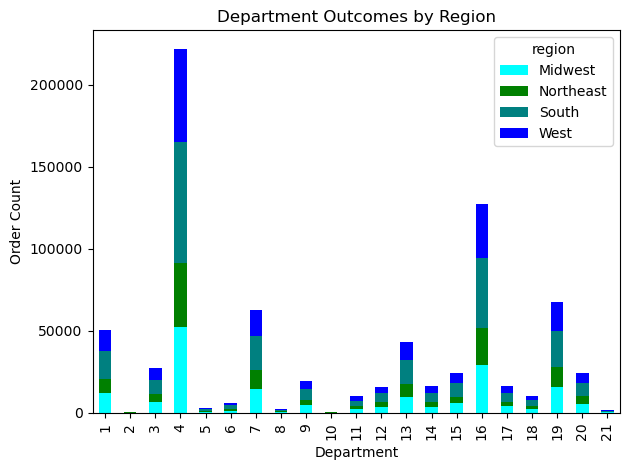

In [58]:
# Chart data with 100% Stacked Bar

colors = ['aqua', 'green', 'teal', 'blue']
dept_by_region_bar = df_dept_by_region.plot(kind='bar', stacked=True, color=colors)
plt.title('Department Outcomes by Region')
plt.xlabel('Department')
plt.ylabel('Order Count')

plt.tight_layout()

department names by column = { 1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol', 6: 'international', 7: 'beverages', 8: 'pets', 9: 'dry goods pasta', 10: 'bulk', 11: 'personal care', 12: 'meat seafood', 13: 'pantry', 14: 'breakfast', 15: 'canned goods', 16: 'dairy eggs', 17: 'household', 18: 'babies', 19: 'snacks', 20: 'deli', }

In [59]:
#Save file to acces
dept_by_region_bar.figure.savefig(os.path.join(path, 'Instacart Basket Anaylsis', '04 Analysis','Visualizations', 'dept_by_region_bar.png'))

In [60]:
# Calculate the total sum of each bar
totals = df_dept_by_region.sum(axis=1)

# Calculate the percentages for each category in each bar
percentages = df_dept_by_region.divide(totals, axis=0) * 100



In [61]:
percentages.head(21)

region,Midwest,Northeast,South,West
department_id,,,,
1,23.504595,17.336793,33.526779,25.631833
2,23.558897,20.300752,33.082707,23.057644
3,23.357824,18.039259,32.558395,26.044522
4,23.521173,17.497782,33.390077,25.590968
5,23.780111,18.313774,33.446572,24.459543
6,23.198708,18.029079,32.875606,25.896607
7,23.231762,18.476741,33.002351,25.289146
8,22.416974,19.003690,31.595941,26.983395
9,23.318866,17.794230,32.902732,25.984172


From the chart and graph above, we can see that there is not a major change in what people order on instacart based on region. each region makes up relatively the same amount of sales. Looking at the top 6 catagroies based of sales (1- frozen, 4- produce, 7- beverages, 13-pantry, 16- dairy, and 19- snacks) you see that each category the percentage from each region is within half a percentage point of being the same ratio.

In [62]:
df_high_activity.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge_sample', 'price_range_loc',
       'busiest_day', 'busiest_days', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'First Name', 'Last_Name', 'Gender', 'State', 'Age',
       'date_joined', 'dependants', 'family_status', 'income', '_merge',
       'region', 'customer_activity', 'customer_profile'],
      dtype='object')

In [63]:
# Create a subset to analyze customer ordering habbits.
user_order_habits = df_high_activity[['user_id','region','Age','income','product_name','department_id','family_status','loyalty_flag','order_frequency','prices','spending_flag','customer_activity','customer_profile']]

#Create graph based on department prefernce, age and income

In [64]:
df_customer_dept_group = df_high_activity.groupby(['department_id', 'customer_profile']).size().unstack()

In [65]:
df_customer_dept_group.head()

customer_profile,high-income middle age,high-income senior group,high-income young adult,low-income middle age,low-income senior group,low-income young adult,mid-income middle age,mid-income senior group,mid-income young adult
department_id,,,,,,,,,
1,7842,4974,170,4828,1476,5899,12514,6219,6566
2,125,72,8,63,34,96,209,89,102
3,4477,2671,100,2523,725,3179,6816,3414,3452
4,33918,21342,417,20913,6020,25062,56299,28016,30064
5,599,303,62,340,111,365,724,348,386


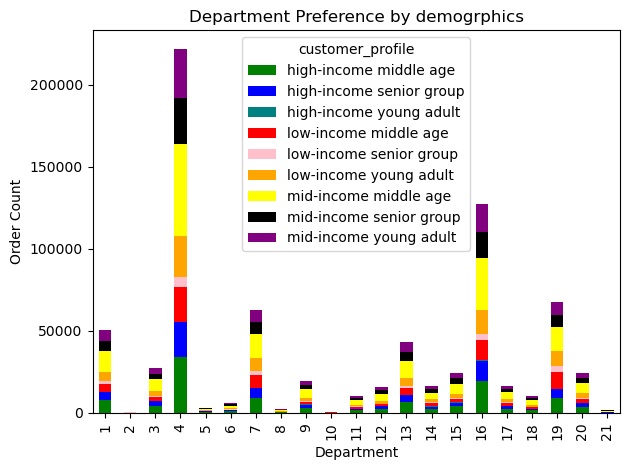

<Figure size 640x480 with 0 Axes>

In [66]:
colors = ['green', 'blue', 'teal', 'red', 'pink', 'orange', 'yellow', 'black', 'purple']
customer_dept_group_bar = df_customer_dept_group.plot(kind='bar', stacked=True, color=colors)

plt.title('Department Preference by demogrphics')
plt.xlabel('Department')
plt.ylabel('Order Count')

# Set y-axis tick format to integer (no scientific notation)
loyal_dept_group_bar.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()
# Save file to access
plt.savefig(os.path.join(path,'Instacart Basket Anaylsis', '04 Analysis','Visualizations', 'department_demographics_stacked_bar'))

department names by column = { 1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol', 6: 'international', 7: 'beverages', 8: 'pets', 9: 'dry goods pasta', 10: 'bulk', 11: 'personal care', 12: 'meat seafood', 13: 'pantry', 14: 'breakfast', 15: 'canned goods', 16: 'dairy eggs', 17: 'household', 18: 'babies', 19: 'snacks', 20: 'deli', }

# group lotalty by region

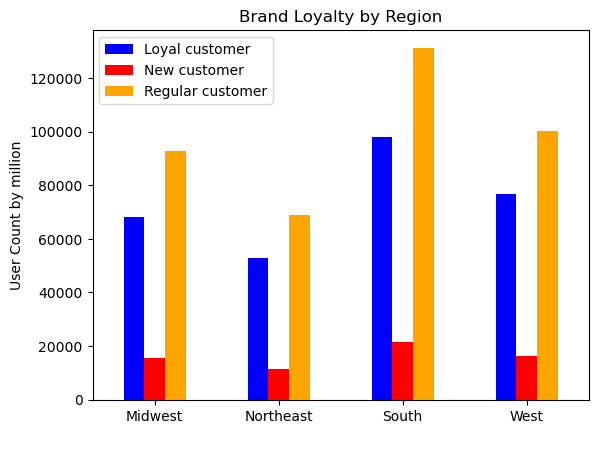

In [67]:


# Group loyalty flag by region
grouped_counts = user_order_habits.groupby(['region', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['blue', 'red', 'orange',])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Brand Loyalty by Region')
plt.xticks(rotation=0)
# Save file to access
plt.savefig(os.path.join(path,'Instacart Basket Anaylsis', '04 Analysis','Visualizations', 'loyalty_by_region_bar.png'))

Most popular products

Text(0, 0.5, ' ')

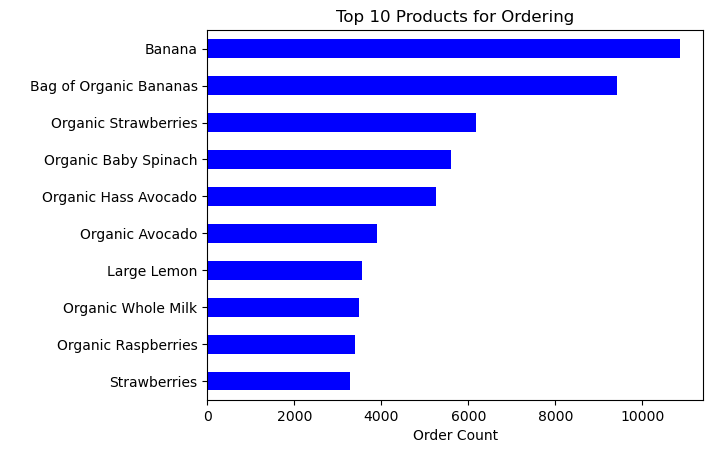

In [68]:
#Finding most popular products
favor_prod=df_high_activity['product_name'].value_counts(dropna=False).head(10).sort_values(ascending= True).plot.barh(color=['blue'])

plt.title('Top 10 Products for Ordering') # Chart title
plt.xlabel('Order Count')  # Label for the x-axis
plt.ylabel(' ')  # Label for the y-axis

In [97]:
df_high_activity.to_pickle(os.path.join(path, 'Instacart Basket Anaylsis','02 Data', 'Prepared Data', 'final_high_activity_set.pkl'))

#10- Export final data set